In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [398]:
df = pd.read_csv('Pricehouse.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceU
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [400]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3478 non-null   object 
 1   Room       3478 non-null   int64  
 2   Parking    3478 non-null   bool   
 3   Warehouse  3478 non-null   bool   
 4   Elevator   3478 non-null   bool   
 5   Address    3455 non-null   object 
 6   Price      3478 non-null   float64
 7   PriceU     3478 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [402]:
df["Parking"] = df["Parking"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)

In [404]:
le = LabelEncoder()
df['AddressEncoded'] = le.fit_transform(df['Address'])
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceU,AddressEncoded
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,156
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67,156
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33,117
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,152
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,150
...,...,...,...,...,...,...,...,...,...
3473,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67,163
3474,83,2,1,1,1,Niavaran,6.800000e+09,226666.67,105
3475,75,2,0,0,0,Parand,3.650000e+08,12166.67,115
3476,105,2,1,1,1,Dorous,5.600000e+09,186666.67,39


In [406]:
X = df[['Area','Room','Parking','Warehouse','Elevator','AddressEncoded']]
y = df[['PriceU']]

In [408]:
X

,Area,Room,Parking,Warehouse,Elevator,AddressEncoded
0,63,1,1,1,1,156
1,60,1,1,1,1,156
2,79,2,1,1,1,117
3,95,2,1,1,1,152
4,123,2,1,1,1,150
...,...,...,...,...,...,...
3473,86,2,1,1,1,163
3474,83,2,1,1,1,105
3475,75,2,0,0,0,115
3476,105,2,1,1,1,39


In [410]:
y

,PriceU
0,61666.67
1,61666.67
2,18333.33
3,30083.33
4,233333.33
...,...
3473,116666.67
3474,226666.67
3475,12166.67
3476,186666.67


In [412]:
X.info()
y['PriceU'] = df['PriceU'].astype('int64')
X


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            3478 non-null   object
 1   Room            3478 non-null   int64 
 2   Parking         3478 non-null   int32 
 3   Warehouse       3478 non-null   int32 
 4   Elevator        3478 non-null   int32 
 5   AddressEncoded  3478 non-null   int32 
dtypes: int32(4), int64(1), object(1)
memory usage: 108.8+ KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2628\2283180859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['PriceU'] = df['PriceU'].astype('int64')


,Area,Room,Parking,Warehouse,Elevator,AddressEncoded
0,63,1,1,1,1,156
1,60,1,1,1,1,156
2,79,2,1,1,1,117
3,95,2,1,1,1,152
4,123,2,1,1,1,150
...,...,...,...,...,...,...
3473,86,2,1,1,1,163
3474,83,2,1,1,1,105
3475,75,2,0,0,0,115
3476,105,2,1,1,1,39


In [416]:
X['Area'] = X['Area'].replace([' ',','],'',regex=True)
X['Area'] = X['Area'].apply(lambda x: int(x))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2628\1731107123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Area'] = X['Area'].replace([' ',','],'',regex=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2628\1731107123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Area'] = X['Area'].apply(lambda x: int(x))


In [422]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [424]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [432]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
y_pred

array([[ 366456.73524687],
       [ 381086.93663082],
       [ 160450.39042586],
       [ 367501.7500453 ],
       [ 166571.18891984],
       [ 112067.11334929],
       [ -19579.88365007],
       [ 376608.30429072],
       [ 165675.46272728],
       [ 162092.55607632],
       [ 148811.44881829],
       [ 167168.34003784],
       [ -63441.24898283],
       [ 355857.30418482],
       [ 119430.99627311],
       [ -41625.68959242],
       [ 166421.90114035],
       [ 156568.90937472],
       [ 173737.0013099 ],
       [ 159362.09723057],
       [ 160450.3907868 ],
       [ 373025.39705086],
       [ 169109.08181721],
       [ 175677.74243388],
       [ 167317.62779834],
       [ 176274.89343789],
       [ -40928.03327821],
       [ 365561.00939625],
       [ 157464.63565277],
       [ 167019.05218235],
       [ -20128.25215628],
       [ -37942.27811569],
       [ 355260.15345627],
       [ 173438.42569392],
       [ 373025.39718383],
       [ 182992.84243246],
       [ 182097.11604993],
 

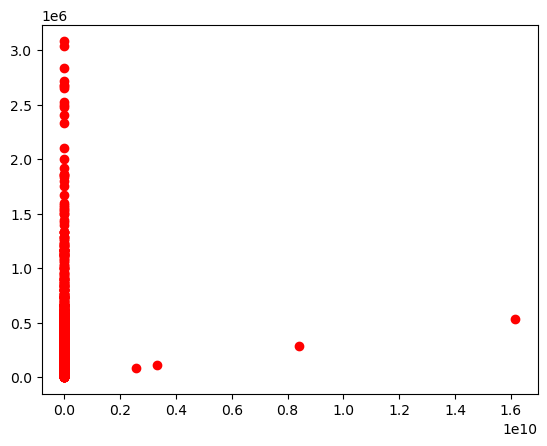

In [450]:
plt.scatter(X['Area'],y['PriceU'],color='red')
plt.show()